In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
#Load the Data
sales = pd.read_csv("sales_data.csv")
product = pd.read_csv("product_info.csv")
customer = pd.read_csv("customer_info.csv")

In [272]:
# Preview first few rows
print(sales.head(),"\n")
print(product.head(),"\n")
print(customer.head())


  order_id customer_id product_id quantity  unit_price order_date  \
0  O966977      C00397      P0022        3       39.25   06-07-25   
1  O696648      C00236      P0023        5       18.92   06-07-25   
2  O202644      C00492      P0011        1       29.68   06-07-25   
3  O501803      C00031      P0003        1       32.76   06-07-25   
4  O322242      C00495      P0016        1       47.62   06-07-25   

  delivery_status payment_method   region  discount_applied  
0       Delivered         PayPal  Central              0.00  
1         DELAYED    credit card    North              0.00  
2       delivered  Bank Transfer    North              0.15  
3      Cancelled     Credit Card  Central              0.20  
4         DELAYED    Credit Card     West              0.20   

  product_id             product_name       category launch_date  base_price  \
0      P0001       Storage Product 39        Storage    11-03-25       15.88   
1      P0002      Cleaning Product 82       Cleanin

In [273]:
#Sales
#Standardise text formatting
sales['delivery_status'] = sales['delivery_status'].str.strip().str.title()
sales['payment_method']= sales['payment_method'].str.strip().str.title()
sales['region'] = sales['region'].str.strip().str.title()
sales['region'] = sales['region'].replace({
    'nrth': 'North',
    'Nrth': 'North'
}).str.title()  
#Convert date columns to datetime using
sales['order_date']= pd.to_datetime(sales['order_date'], errors='coerce')

#Handle missing values
sales['discount_applied'] = sales['discount_applied'].fillna(0.0)
sales['delivery_status'] = sales['delivery_status'].fillna("Unkown")
sales['payment_method']=sales['payment_method'].fillna("Unkown")

#Remove duplicates
sales = sales.drop_duplicates(subset='order_id')

# Convert relevant columns to numeric, coercing errors into NaN
sales['quantity'] = pd.to_numeric(sales['quantity'], errors='coerce')
sales['unit_price'] = pd.to_numeric(sales['unit_price'], errors='coerce')
sales['discount_applied'] = pd.to_numeric(sales['discount_applied'], errors='coerce')

# Drop rows with NaN in these critical numeric columns
sales = sales.dropna(subset=['quantity', 'unit_price', 'discount_applied'])

#Validate numeric columns 
sales = sales[(sales['quantity'] >= 0) & 
              (sales['unit_price'] >= 0) & 
              (sales['discount_applied'] >= 0)]

In [274]:
print(sales.head(),"\n")

  order_id customer_id product_id  quantity  unit_price order_date  \
0  O966977      C00397      P0022       3.0       39.25 2025-06-07   
1  O696648      C00236      P0023       5.0       18.92 2025-06-07   
2  O202644      C00492      P0011       1.0       29.68 2025-06-07   
3  O501803      C00031      P0003       1.0       32.76 2025-06-07   
4  O322242      C00495      P0016       1.0       47.62 2025-06-07   

  delivery_status payment_method   region  discount_applied  
0       Delivered         Paypal  Central              0.00  
1         Delayed    Credit Card    North              0.00  
2       Delivered  Bank Transfer    North              0.15  
3       Cancelled    Credit Card  Central              0.20  
4         Delayed    Credit Card     West              0.20   



In [275]:
#Product
#Standardise text formatting
product['product_name'] =product['product_name'].str.strip().str.title()
product['category'] =product['category'].str.strip().str.title()

#Convert date columns (launch_date) to datetime 
product['launch_date'] = pd.to_datetime(product['launch_date'],errors= 'coerce')

#Handle missing values
product['category']= product['category'].fillna("Unknown")


#Remove duplicates
product = product.drop_duplicates(subset='product_id')

#Validate numeric
product = product[product['base_price'] >= 0]

C:\Users\feras\AppData\Local\Temp\ipykernel_7044\2125293341.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product['launch_date'] = pd.to_datetime(product['launch_date'],errors= 'coerce')


In [276]:
print(product.head(),"\n")

  product_id             product_name       category launch_date  base_price  \
0      P0001       Storage Product 39        Storage  2025-11-03       15.88   
1      P0002      Cleaning Product 82       Cleaning  2024-08-18       34.23   
2      P0003      Cleaning Product 85       Cleaning  2024-07-15        7.92   
3      P0004       Kitchen Product 82        Kitchen  2025-04-19        9.13   
4      P0005  Personal Care Product 1  Personal Care  2024-10-20       31.10   

  supplier_code  
0          S339  
1          S974  
2          S745  
3          S589  
4          S559   



In [277]:
#customer
#Standardise text
customer['gender']=customer['gender'].str.strip().str.title()
customer['region']=customer['region'].str.strip().str.title()
customer['loyalty_tier']= customer['loyalty_tier'].str.strip().str.title()

#Convert date columns (signup_date) to datetime
customer['signup_date'] = pd.to_datetime(customer['signup_date'],errors= 'coerce')

#Handle missing values
customer['gender'] = customer['gender'].fillna("Other")
customer['loyalty_tier'] = customer['loyalty_tier'].fillna("Bronze")
customer['region']=customer['region'].fillna("Unkown")

customer['loyalty_tier'] = customer['loyalty_tier'].replace({
    'Brnze': 'Bronze',
    'Silvr': 'Silver',
    'Gld':'Gold',
    'Sllver':'Silver'
}).str.title()  
#Remove duplicate customers
customer = customer.drop_duplicates(subset='customer_id')

C:\Users\feras\AppData\Local\Temp\ipykernel_7044\4145118586.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer['signup_date'] = pd.to_datetime(customer['signup_date'],errors= 'coerce')


In [328]:
print(customer.head())

  customer_id                    email signup_date  gender   region  \
0      C00001   shaneramirez@gmail.com  2025-04-26    Male  Central   
1      C00002    jpeterson@bernard.com  2024-11-08  Female  Central   
2      C00003  howardmaurice@yahoo.com  2025-05-15    Male  Central   
3      C00004      yherrera@arnold.org  2025-06-14  Female  Central   
4      C00005  janetwilliams@gmail.com  2025-02-05    Male     West   

  loyalty_tier  
0       Silver  
1         Gold  
2         Gold  
3         Gold  
4       Bronze  


In [329]:
#Merge the Data
result = pd.merge(sales, product,on ='product_id',how='left')
merged_df =pd.merge(result,customer,on='customer_id',how='left')

print(merged_df.head())

  order_id customer_id product_id  quantity  unit_price order_date  \
0  O966977      C00397      P0022       3.0       39.25 2025-06-07   
1  O696648      C00236      P0023       5.0       18.92 2025-06-07   
2  O202644      C00492      P0011       1.0       29.68 2025-06-07   
3  O501803      C00031      P0003       1.0       32.76 2025-06-07   
4  O322242      C00495      P0016       1.0       47.62 2025-06-07   

  delivery_status payment_method region_x  discount_applied  \
0       Delivered         Paypal  Central              0.00   
1         Delayed    Credit Card    North              0.00   
2       Delivered  Bank Transfer    North              0.15   
3       Cancelled    Credit Card  Central              0.20   
4         Delayed    Credit Card     West              0.20   

          product_name  category launch_date  base_price supplier_code  \
0  Cleaning Product 86  Cleaning  2024-04-10       19.77          S924   
1  Outdoors Product 32  Outdoors  2025-01-18       3

In [280]:
#create revenue
merged_df['revenue'] = merged_df['quantity']* merged_df['unit_price']*(1 - merged_df['discount_applied'])
#Order week
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week
#price band
merged_df['price_band'] = pd.cut(merged_df['unit_price'],bins=[-float('inf'),15,30,float('inf')],labels=['Low','Medium','High'])
#days to order
merged_df['days_to_order'] = (merged_df['order_date']-merged_df['launch_date'])
#email domain
merged_df['email_domain'] = merged_df['email'].str.split('@').str[-1]
#is late
merged_df['is_late'] = merged_df['delivery_status'] == 'Delayed'

In [314]:
print(merged_df.head())

  order_id customer_id product_id  quantity  unit_price order_date  \
0  O966977      C00397      P0022       3.0       39.25 2025-06-07   
1  O696648      C00236      P0023       5.0       18.92 2025-06-07   
2  O202644      C00492      P0011       1.0       29.68 2025-06-07   
3  O501803      C00031      P0003       1.0       32.76 2025-06-07   
4  O322242      C00495      P0016       1.0       47.62 2025-06-07   

  delivery_status payment_method region_x  discount_applied  ... loyalty_tier  \
0       Delivered         Paypal  Central              0.00  ...       Silver   
1         Delayed    Credit Card    North              0.00  ...         Gold   
2       Delivered  Bank Transfer    North              0.15  ...         Gold   
3       Cancelled    Credit Card  Central              0.20  ...         Gold   
4         Delayed    Credit Card     West              0.20  ...         Gold   

   revenue order_week  price_band days_to_order       email_domain is_late  \
0  117.750    

In [282]:
#Weekly revenue trends by region
Weekly_revenue = merged_df.groupby(['region_x','order_week'])['revenue'].sum().reset_index()
print(Weekly_revenue)

  region_x  order_week     revenue
0  Central          23  47167.6415
1     East          23  47862.7280
2    North          23  46880.9295
3    South          23  49716.3350
4     West          23  48104.2505


In [283]:
#Product category performance (revenue, quantity, discount)
product_performnce = merged_df.groupby('category').agg({
    'revenue':'sum',
    'quantity':'sum',
    'discount_applied':'mean'
}).reset_index()
print(product_performnce)

        category     revenue  quantity  discount_applied
0       Cleaning  93621.7840    3584.0          0.085566
1        Kitchen  33933.6760    1226.0          0.075622
2       Outdoors  40062.0680    1519.0          0.082016
3  Personal Care  24916.6365     902.0          0.086755
4        Storage  46931.4575    1730.0          0.081043


In [284]:
#Customer behaviour by loyalty_tier and signup_month
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M')
customer_behavior = merged_df.groupby(['loyalty_tier','signup_month']).agg({
    'customer_id': 'nunique',
    'revenue': 'sum',
    'quantity': 'sum'
}).reset_index().rename(columns={'customer_id': 'unique_customers'})
print(customer_behavior)

   loyalty_tier signup_month  unique_customers    revenue  quantity
0        Bronze      2024-01                 2   478.6450      19.0
1        Bronze      2024-02                 3  1843.8570      62.0
2        Bronze      2024-03                 2  1142.6895      38.0
3        Bronze      2024-04                 1    71.2800       3.0
4        Bronze      2024-05                 1   273.6810      11.0
..          ...          ...               ...        ...       ...
62       Silver      2025-06                 9  4699.9620     182.0
63       Silver      2025-07                 1   336.9020      13.0
64       Silver      2025-08                 1   301.1865      10.0
65       Silver      2025-10                 1  1183.7035      35.0
66       Silver      2025-12                 2   741.0690      40.0

[67 rows x 5 columns]


In [285]:
#Delivery performance by region and price_band
delivery_performance = merged_df.groupby(['region_x', 'price_band'])['is_late'].mean().reset_index()
delivery_performance['late_percentage'] = (delivery_performance['is_late'] * 100).round(2)
print(delivery_performance)

   region_x price_band   is_late  late_percentage
0   Central        Low  0.380531            38.05
1   Central     Medium  0.391111            39.11
2   Central       High  0.393939            39.39
3      East        Low  0.416667            41.67
4      East     Medium  0.421941            42.19
5      East       High  0.409774            40.98
6     North        Low  0.383178            38.32
7     North     Medium  0.439024            43.90
8     North       High  0.361775            36.18
9     South        Low  0.329897            32.99
10    South     Medium  0.361386            36.14
11    South       High  0.420339            42.03
12     West        Low  0.389610            38.96
13     West     Medium  0.351020            35.10
14     West       High  0.381481            38.15


In [286]:
#Preferred payment methods by loyalty_tier
payment_preferences = merged_df.groupby(['loyalty_tier', 'payment_method'])['customer_id'].count().reset_index()
payment_preferences = payment_preferences.rename(columns={'customer_id': 'transaction_count'})
print(payment_preferences)

   loyalty_tier payment_method  transaction_count
0        Bronze  Bank Transfer                178
1        Bronze    Credit Card                290
2        Bronze         Paypal                166
3          Gold  Bank Transfer                403
4          Gold   Bank Transfr                  1
5          Gold    Credit Card                840
6          Gold         Paypal                429
7          Gold         Unkown                  2
8        Silver  Bank Transfer                190
9        Silver    Credit Card                304
10       Silver         Paypal                162
11       Silver         Unkown                  1


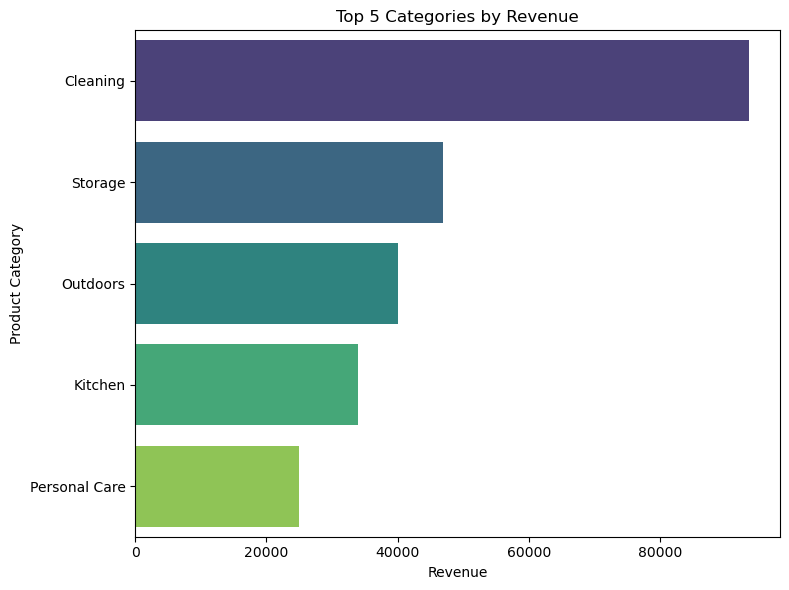

In [287]:
#Bar chart - top 5 categories by revenue
top_categories = merged_df.groupby('category')['revenue'].sum().nlargest(5).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=top_categories, x='revenue', y='category', palette='viridis')
plt.title('Top 5 Categories by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


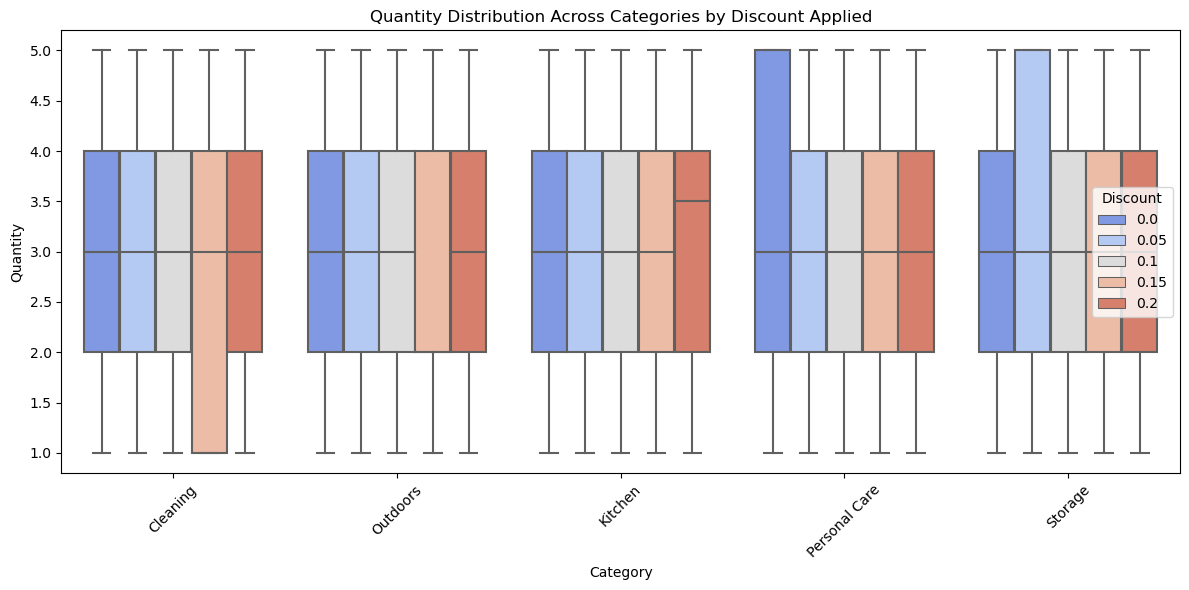

In [288]:
#Boxplot - quantity vs discount across categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='category', y='quantity', hue='discount_applied', palette='coolwarm')
plt.title('Quantity Distribution Across Categories by Discount Applied')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.legend(title='Discount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


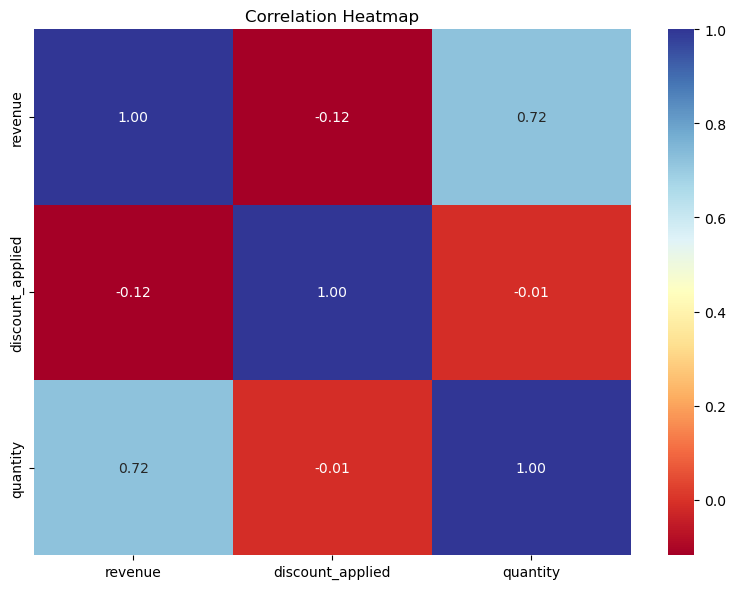

In [289]:
#Heatmap - correlation between revenue, discount, and quantity
plt.figure(figsize=(8, 6))
corr = merged_df[['revenue', 'discount_applied', 'quantity']].corr()
sns.heatmap(corr, annot=True, cmap='RdYlBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


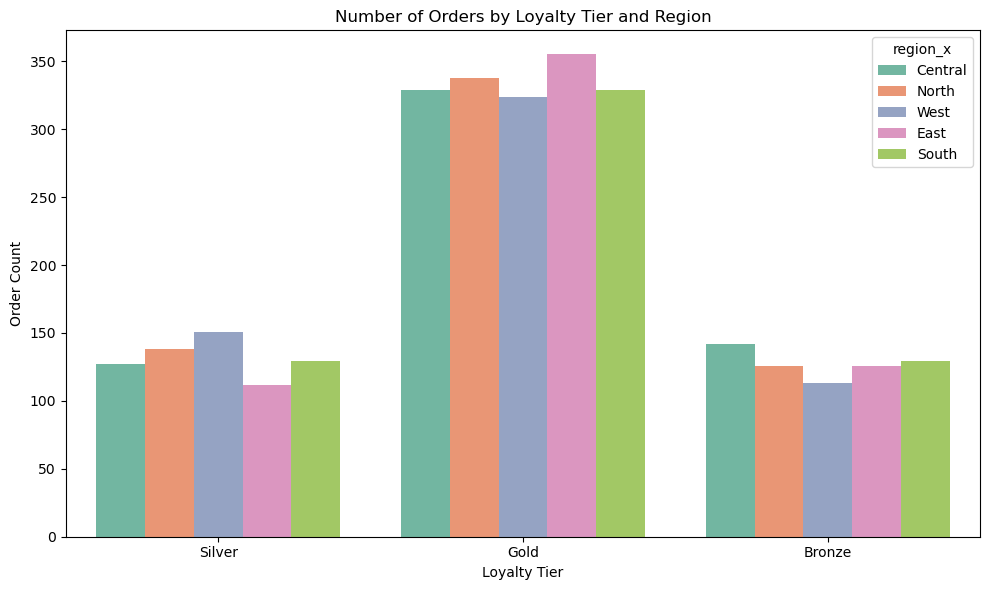

In [290]:
#Countplot - orders by loyalty tier (with hue = region)
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='loyalty_tier', hue='region_x', palette='Set2')
plt.title('Number of Orders by Loyalty Tier and Region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()


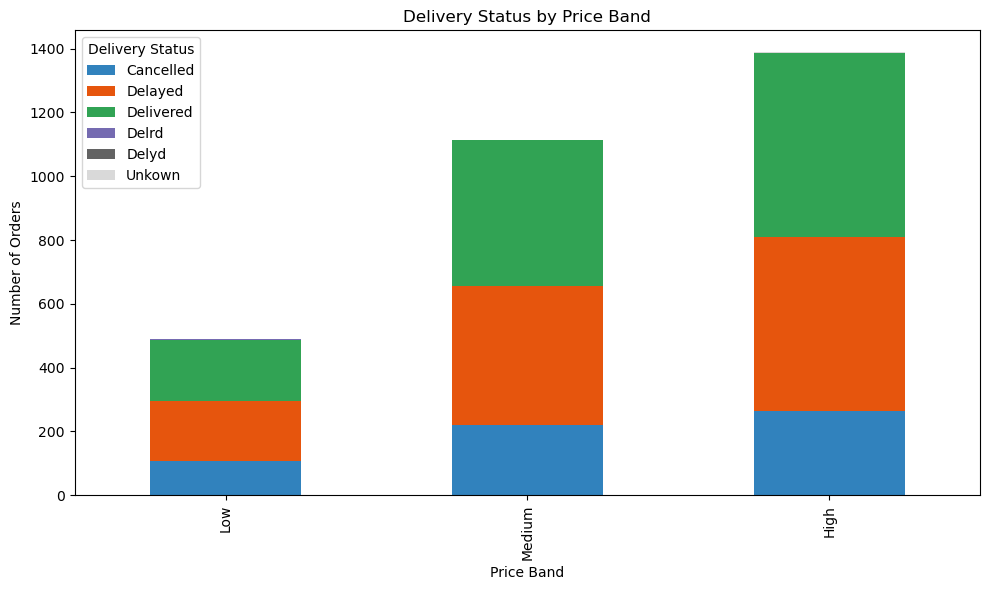

In [291]:
# Stacked bar or pie - delivery status by price band
delivery = merged_df.groupby(['price_band', 'delivery_status']).size().unstack(fill_value=0)


delivery.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Delivery Status by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()


In [292]:
#Which product categories drive the most revenue, and in which regions?
category_region_revenue = merged_df.groupby(['category','region_x'])['revenue'].sum().reset_index()
top_category_per_region = category_region_revenue.sort_values('revenue', ascending=False).groupby('region_x').head(1)

print(top_category_per_region)

   category region_x     revenue
1  Cleaning     East  19911.2990
3  Cleaning    South  18887.3650
2  Cleaning    North  18766.1035
4  Cleaning     West  18038.1790
0  Cleaning  Central  18018.8375


In [293]:
#Do discounts lead to more items sold?
merged_df['discount_percent'] = merged_df['discount_applied'] * 100

merged_df['discount_bin'] = pd.cut(
    merged_df['discount_percent'],
    bins=[-0.1, 0, 5, 10, 15, 20],  # Cover all percent ranges
    labels=['0%', '1–5%', '6–10%', '11–15%', '16–20%'],
    right=True  # include upper bound in bin
)

discount_sales = merged_df.groupby('discount_bin')['quantity'].sum().reset_index()
print(discount_sales)



  discount_bin  quantity
0           0%    2976.0
1         1–5%    1552.0
2        6–10%    1509.0
3       11–15%    1504.0
4       16–20%    1442.0


In [294]:
#Which loyalty tier generates the most value?
tier_value = merged_df.groupby('loyalty_tier').agg({'revenue':'sum', 'order_id':'nunique'}).reset_index()
tier_value['avg_order_value'] = tier_value['revenue'] / tier_value['order_id']
print(tier_value)

  loyalty_tier      revenue  order_id  avg_order_value
0       Bronze   49930.5380       635        78.630769
1         Gold  136787.7865      1675        81.664350
2       Silver   52032.6080       657        79.197272


In [300]:
#Are certain regions struggling with delivery delays?
delay_counts = merged_df[merged_df['delivery_status'] == 'Delayed'].groupby('region_x').size()
total_counts = merged_df[merged_df['delivery_status'] != 'Cancelled'].groupby('region_x').size()
delay_percentage = (delay_counts / total_counts * 100).reset_index(name='delay_percentage')
print(delay_percentage)


  region_x  delay_percentage
0  Central         49.266247
1     East         49.700599
2    North         48.565574
3    South         48.008386
4     West         47.816594


In [310]:
#Do customer signup patterns influence purchasing activity?
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M')

# Step 2: Count number of unique users per month
signup_counts = merged_df[['customer_id', 'signup_month']].drop_duplicates()
signup_counts = signup_counts.groupby('signup_month')['customer_id'].nunique().reset_index()
signup_counts.columns = ['signup_month', 'num_users']

# Step 3: Count number of orders per customer
customer_orders = merged_df.groupby('customer_id')['order_id'].nunique().reset_index()
customer_orders.columns = ['customer_id', 'num_orders']

# Step 4: Merge orders with signup month (unique signup month per customer)
customer_signup = merged_df[['customer_id', 'signup_month']].drop_duplicates()
cohort_df = pd.merge(customer_orders, customer_signup, on='customer_id')

# Step 5: Group by signup month to get total orders and average
cohort_stats = cohort_df.groupby('signup_month').agg(
    total_orders=('num_orders', 'sum'),
    avg_orders_per_customer=('num_orders', 'mean')
).reset_index()

# Step 6: Merge with number of users
final_df = pd.merge(signup_counts, cohort_stats, on='signup_month')

print(final_df)


   signup_month  num_users  total_orders  avg_orders_per_customer
0       2024-01          8            51                 6.375000
1       2024-02          9            44                 4.888889
2       2024-03          8            44                 5.500000
3       2024-04          7            29                 4.142857
4       2024-05          6            25                 4.166667
5       2024-06         13            76                 5.846154
6       2024-07         31           175                 5.645161
7       2024-08         34           199                 5.852941
8       2024-09         38           234                 6.157895
9       2024-10         44           264                 6.000000
10      2024-11         33           211                 6.393939
11      2024-12         35           202                 5.771429
12      2025-01         30           177                 5.900000
13      2025-02         29           187                 6.448276
14      20

In [323]:
# Create time delta between order and signup
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['signup_date']).dt.days

# Filter using .query()
q2_customers = merged_df.query(
    "signup_date.dt.month >= 4 and signup_date.dt.month <= 6 and days_to_order <= 14.0 and discount_applied >= 0.20"
)

print(q2_customers[['customer_id', 'signup_date', 'order_date', 'discount_applied']])


     customer_id signup_date order_date  discount_applied
32        C00259  2025-06-25 2025-06-07               0.2
155       C00369  2025-06-27 2025-06-07               0.2
364       C00320  2025-06-18 2025-06-07               0.2
814       C00369  2025-06-27 2025-06-07               0.2
1319      C00321  2025-06-20 2025-06-07               0.2
1337      C00498  2025-06-21 2025-06-07               0.2
1356      C00442  2025-06-13 2025-06-07               0.2
1382      C00039  2025-06-16 2025-06-07               0.2
1441      C00313  2025-06-25 2025-06-07               0.2
1446      C00498  2025-06-21 2025-06-07               0.2
1479      C00321  2025-06-20 2025-06-07               0.2
1514      C00321  2025-06-20 2025-06-07               0.2
1553      C00069  2025-06-22 2025-06-07               0.2
1587      C00321  2025-06-20 2025-06-07               0.2
1626      C00356  2025-06-04 2025-06-07               0.2
1672      C00377  2025-06-13 2025-06-07               0.2
1691      C000

In [326]:
#Use MinMaxScaler to normalise price
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
merged_df['unit_price_scaled'] = scaler.fit_transform(merged_df[['unit_price']])


print(merged_df[['unit_price', 'unit_price_scaled']].head())


   unit_price  unit_price_scaled
0       39.25           0.744225
1       18.92           0.260062
2       29.68           0.516313
3       32.76           0.589664
4       47.62           0.943558
